In [1]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
njobs = 4
randomState = 0

In [2]:
# Load preprocessed data
X_train = pd.read_csv("cleanData_CV/X_train.csv")
X_test = pd.read_csv("cleanData_CV/X_test.csv")
y_train = pd.read_csv("cleanData_CV/y_train.csv", header = None)
y_test = pd.read_csv("cleanData_CV/y_test.csv", header = None)
y_train = y_train[0]
y_test = y_test[0]

In [3]:
# Define error measure for official scoring : RMSE
#def rmse(y_train, y_train_pred):
#    return(np.sqrt(mean_squared_error(y_train, y_train_pred)))

scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [4]:
'''# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()'''

'# Linear Regression\nlr = LinearRegression()\nlr.fit(X_train, y_train)\n\n# Look at predictions on training and validation set\nprint("RMSE on Training set :", rmse_cv_train(lr).mean())\nprint("RMSE on Test set :", rmse_cv_test(lr).mean())\ny_train_pred = lr.predict(X_train)\ny_test_pred = lr.predict(X_test)\n\n# Plot residuals\nplt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")\nplt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")\nplt.title("Linear regression")\nplt.xlabel("Predicted values")\nplt.ylabel("Residuals")\nplt.legend(loc = "upper left")\nplt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")\nplt.show()\n\n# Plot predictions\nplt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")\nplt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")\nplt.title("Linear regression")\nplt.xlabel("Predicted values")\n

In [5]:
#print("Errors seem randomly distributed and randomly scattered around the centerline")
#print("This is good. It means our model was able to capture most of the explanatory information")
#print("Most of the outliers come from the validation set, we overfit quite a bit (as expected, since we didn't regularize)")

In [6]:
'''# Try to reduce overfitting using regularization
print("Try to reduce overfitting using regularization")
#print("Training RMSEs will be worse than without regularization, but generalization to unknown data should be better ")

# 1 Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, alpha * .95, 
                          alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")


#print("Quite smaller difference between training and validation -> less overfitting")'''

'# Try to reduce overfitting using regularization\nprint("Try to reduce overfitting using regularization")\n#print("Training RMSEs will be worse than without regularization, but generalization to unknown data should be better ")\n\n# 1 Ridge\nridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])\nridge.fit(X_train, y_train)\nalpha = ridge.alpha_\nprint("Best alpha :", alpha)\n\nprint("Try again for more precision with alphas centered around " + str(alpha))\nridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, alpha * .95, \n                          alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], \n                cv = 10)\nridge.fit(X_train, y_train)\nalpha = ridge.alpha_\nprint("Best alpha :", alpha)\n\nprint("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())\nprint("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())\ny_train_rdg 

Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00054
Lasso RMSE on Training set : 0.111944967669
Lasso RMSE on Test set : 0.116418746722


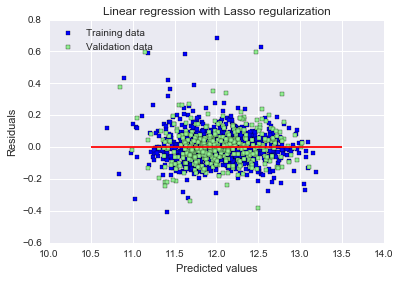

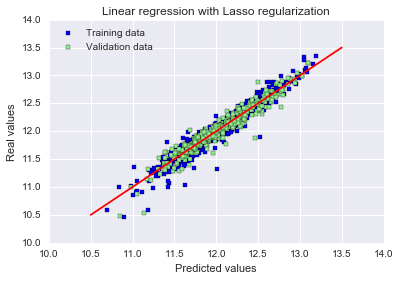

Lasso picked 128 features and eliminated the other 278 features


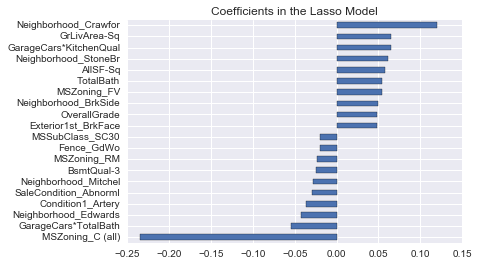

In [7]:
# 2 Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 
                max_iter = 50000, n_jobs = njobs, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, alpha * .95, 
                          alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                max_iter = 50000, n_jobs = njobs, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#print("Generalization seems a tad better than with Ridge")

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best l1_ratio : 0.9
Best alpha : 0.0006
Try again for more precision with l1_ratio centered around 0.9
Best l1_ratio : 0.9
Best alpha : 0.0006
Now try again for more precision on alpha, with l1_ratio fixed at 0.9 and alpha centered around 0.0006
Best l1_ratio : 0.9
Best alpha : 0.0006
ElasticNet RMSE on Training set : 0.111917367829
ElasticNet RMSE on Test set : 0.117024199555


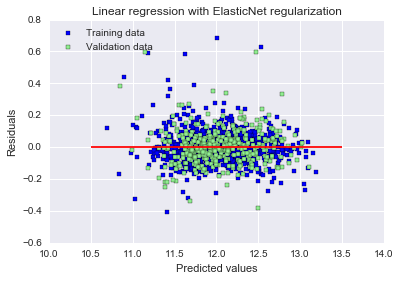

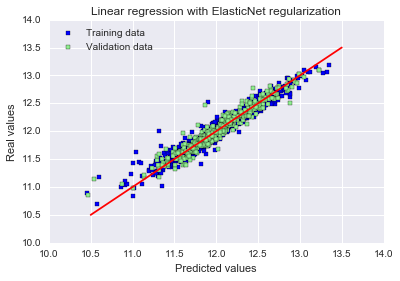

ElasticNet picked 130 features and eliminated the other 276 features


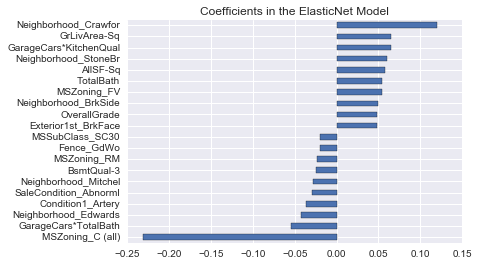

In [8]:
# 3 ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")

#print("Optimal ratio is close to 1, i.e. to a L1/Lasso regularization")
#print("With different settings or sample size, we might see the power of ElasticNet over Lasso")

In [9]:
# Removal of MSZoning_C (all)
print("The feature MSZoning_C (all) seems to have a disproportionate impact in both Lasso and ElasticNet")
print("It may be a cause for overfitting, let's try to remove it and check the results")
X_train = X_train.drop("MSZoning_C (all)", axis = 1)
X_test = X_test.drop("MSZoning_C (all)", axis = 1)

The feature MSZoning_C (all) seems to have a disproportionate impact in both Lasso and ElasticNet
It may be a cause for overfitting, let's try to remove it and check the results


Best alpha : 0.0006
Try again for more precision with alphas centered around 0.0006
Best alpha : 0.00063
Lasso RMSE on Training set : 0.113347252037
Lasso RMSE on Test set : 0.117265418901


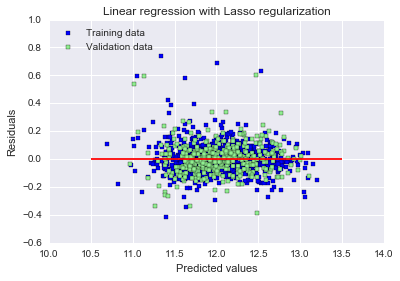

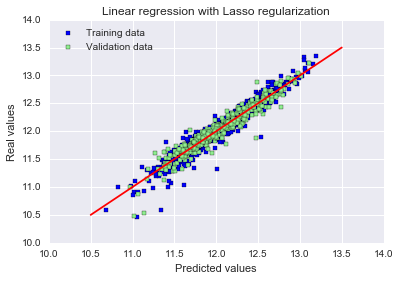

Lasso picked 122 features and eliminated the other 283 features


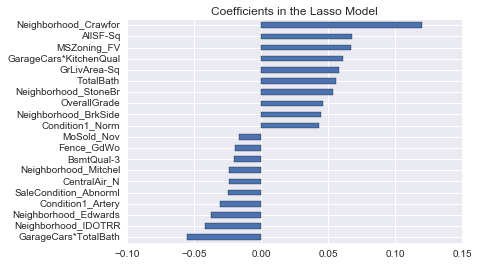

C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best l1_ratio : 0.1
Best alpha : 0.006
Try again for more precision with l1_ratio centered around 0.1


C:\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Best l1_ratio : 0.085
Best alpha : 0.006
Now try again for more precision on alpha, with l1_ratio fixed at 0.085 and alpha centered around 0.006
Best l1_ratio : 0.085
Best alpha : 0.0063
ElasticNet RMSE on Training set : 0.113307350275
ElasticNet RMSE on Test set : 0.117185076737


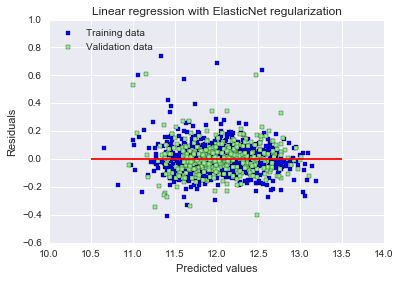

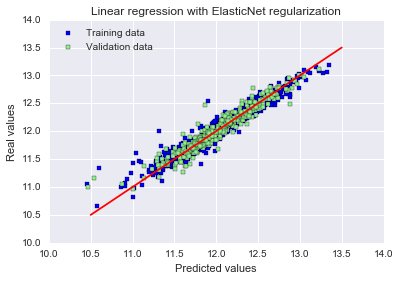

ElasticNet picked 154 features and eliminated the other 251 features


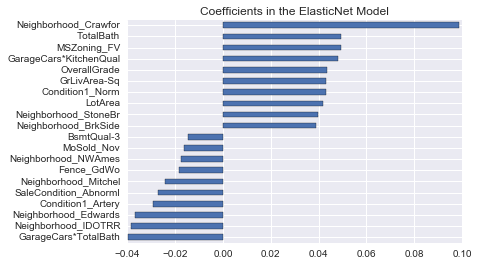

In [10]:
# 2 Lasso
lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 
                max_iter = 50000, n_jobs = njobs, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, alpha * .95, 
                          alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                max_iter = 50000, n_jobs = njobs, cv = 10)
lasso.fit(X_train, y_train)
alpha = lasso.alpha_
print("Best alpha :", alpha)

print("Lasso RMSE on Training set :", rmse_cv_train(lasso).mean())
print("Lasso RMSE on Test set :", rmse_cv_test(lasso).mean())
y_train_las = lasso.predict(X_train)
y_test_las = lasso.predict(X_test)

# Plot residuals
plt.scatter(y_train_las, y_train_las - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test_las - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_las, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_las, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Lasso regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

# 3 ElasticNet
elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                    0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Try again for more precision with l1_ratio centered around " + str(ratio))
elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                          alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("Now try again for more precision on alpha, with l1_ratio fixed at " + str(ratio) + 
      " and alpha centered around " + str(alpha))
elasticNet = ElasticNetCV(l1_ratio = ratio,
                          alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                    alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                    alpha * 1.35, alpha * 1.4], 
                          max_iter = 75000, n_jobs = njobs, cv = 10)
elasticNet.fit(X_train, y_train)
if (elasticNet.l1_ratio_ > 1):
    elasticNet.l1_ratio_ = 1    
alpha = elasticNet.alpha_
ratio = elasticNet.l1_ratio_
print("Best l1_ratio :", ratio)
print("Best alpha :", alpha )

print("ElasticNet RMSE on Training set :", rmse_cv_train(elasticNet).mean())
print("ElasticNet RMSE on Test set :", rmse_cv_test(elasticNet).mean())
y_train_ela = elasticNet.predict(X_train)
y_test_ela = elasticNet.predict(X_test)

# Plot residuals
plt.scatter(y_train_ela, y_train_ela - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_ela, y_test_ela - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train, y_train_ela, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test_ela, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with ElasticNet regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(elasticNet.coef_, index = X_train.columns)
print("ElasticNet picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the ElasticNet Model")

In [11]:
# Write predictions in CSV file
now = datetime.datetime.now()
lasso_name = "preds/lassoLR_CV_" + str(now.strftime("%Y-%m-%d-%H-%M")) + ".csv"
preds = pd.DataFrame({"SalePrice": np.expm1(lasso.predict(X_test))}, columns = ["SalePrice"])
preds.to_csv(lasso_name, index = False)

elastic_name = "preds/elasticLR_CV_" + str(now.strftime("%Y-%m-%d-%H-%M")) + ".csv"
preds = pd.DataFrame({"SalePrice": np.expm1(elasticNet.predict(X_test))}, columns = ["SalePrice"])
preds.to_csv(elastic_name, index = False)

In [12]:
'''# Now let's use only the X most important features and see if results improve
temp_train = pd.concat([X_train, y_train], axis = 1)
temp_corr = temp_train.corr()
temp_corr.sort_values(["SalePrice"], ascending = False, inplace = True)
i = 0
corr_coefs = [0.20, 0.15, 0.10, 0.09, 0.08, 0.07, 0.06, 0.055, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01]
rmse_train_lr, rmse_test_lr, rmse_train_rdg, rmse_test_rdg, rmse_train_las, rmse_test_las, rmse_train_ela, \
rmse_test_ela = [[0 for x in range(len(corr_coefs))] for i in range(8)]
nb_features = [0 for x in range(len(corr_coefs))]
for coef in corr_coefs :
    print("Correlation > " + str(coef) + " : ")
    important_features = temp_corr[abs(temp_corr.SalePrice) > coef]
    important_features = important_features.drop(["SalePrice"], axis = 0)
    nb_features[i] = important_features.shape[0]
    print("Starting number of features : " + str(nb_features[i]))
    
    # Simple Linear regression
    lr.fit(X_train[important_features.index], y_train)
    y_train_lr = lr.predict(X_train[important_features.index])
    y_test_lr = lr.predict(X_test[important_features.index])
    rmse_train_lr[i] = rmse_cv_train(lr).mean()
    rmse_test_lr[i] = rmse_cv_test(lr).mean()
    print("Simple Linear Regression RMSE on Training set :", rmse_train_lr[i])
    print("Simple Linear Regression RMSE on Test set :", rmse_test_lr[i])
    
    # Ridge regularization
    rdg = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv = 10)
    rdg.fit(X_train[important_features.index], y_train)
    alpha = rdg.alpha_
    rdg = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                            alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, 
                            alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                  cv = 10)
    rdg.fit(X_train[important_features.index], y_train)
    alpha = rdg.alpha_
    y_train_rdg = rdg.predict(X_train[important_features.index])
    y_test_rdg = rdg.predict(X_test[important_features.index])
    rmse_train_rdg[i] = rmse_cv_train(rdg).mean()
    rmse_test_rdg[i] = rmse_cv_test(rdg).mean()
    print("Ridge RMSE on Training set :", rmse_train_rdg[i])
    print("Ridge RMSE on Test set :", rmse_test_rdg[i])
    
    # Lasso regularization
    lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1], 
                    max_iter = 20000, cv = 10, n_jobs = njobs)
    lasso.fit(X_train[important_features.index], y_train)
    alpha = lasso.alpha_
    lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                              alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                              alpha * 1.35, alpha * 1.4], 
                    max_iter = 20000, cv = 10, n_jobs = njobs)
    lasso.fit(X_train[important_features.index], y_train)
    alpha = lasso.alpha_
    y_train_las = lasso.predict(X_train[important_features.index])
    y_test_las = lasso.predict(X_test[important_features.index])
    rmse_train_las[i] = rmse_cv_train(lasso).mean()
    rmse_test_las[i] = rmse_cv_test(lasso).mean()
    print("Lasso RMSE on Training set :", rmse_train_las[i])
    print("Lasso RMSE on Test set :", rmse_test_las[i])
    
    # ElasticNet regularization
    elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                              alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                        0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                              max_iter = 500000, cv = 10, n_jobs = njobs)
    elasticNet.fit(X_train[important_features.index], y_train)
    alpha = elasticNet.alpha_
    ratio = elasticNet.l1_ratio_
    elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                              alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                        alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                        alpha * 1.35, alpha * 1.4], 
                              max_iter = 500000, cv = 10, n_jobs = njobs)
    elasticNet.fit(X_train[important_features.index], y_train)
    if (elasticNet.l1_ratio_ > 1):
        elasticNet.l1_ratio_ = 1    
    alpha = elasticNet.alpha_
    ratio = elasticNet.l1_ratio_
    y_train_ela = elasticNet.predict(X_train[important_features.index])
    y_test_ela = elasticNet.predict(X_test[important_features.index])
    rmse_train_ela[i] = rmse_cv_train(elasticNet).mean()
    rmse_test_ela[i] = rmse_cv_test(elasticNet).mean()
    print("ElasticNet RMSE on Training set :", rmse_train_ela[i])
    print("ElasticNet RMSE on Test set :", rmse_test_ela[i])

    i += 1
    print("---------")'''

'# Now let\'s use only the X most important features and see if results improve\ntemp_train = pd.concat([X_train, y_train], axis = 1)\ntemp_corr = temp_train.corr()\ntemp_corr.sort_values(["SalePrice"], ascending = False, inplace = True)\ni = 0\ncorr_coefs = [0.20, 0.15, 0.10, 0.09, 0.08, 0.07, 0.06, 0.055, 0.05, 0.045, 0.04, 0.035, 0.03, 0.025, 0.02, 0.015, 0.01]\nrmse_train_lr, rmse_test_lr, rmse_train_rdg, rmse_test_rdg, rmse_train_las, rmse_test_las, rmse_train_ela, rmse_test_ela = [[0 for x in range(len(corr_coefs))] for i in range(8)]\nnb_features = [0 for x in range(len(corr_coefs))]\nfor coef in corr_coefs :\n    print("Correlation > " + str(coef) + " : ")\n    important_features = temp_corr[abs(temp_corr.SalePrice) > coef]\n    important_features = important_features.drop(["SalePrice"], axis = 0)\n    nb_features[i] = important_features.shape[0]\n    print("Starting number of features : " + str(nb_features[i]))\n    \n    # Simple Linear regression\n    lr.fit(X_train[importan

In [13]:
'''# Plot RMSEs
plt.title("RMSE of simple Linear Regression")
plt.xlabel("Top X features used")
plt.ylabel("RMSE")
train_lr = pd.Series(rmse_train_lr, index = nb_features)
train_lr.plot(label = "Train - simple LR", color = "green", ls = "--")
test_lr = pd.Series(rmse_test_lr, index = nb_features)
test_lr.plot(label = "Test - simple LR", color = "green")
plt.legend(loc = "upper left")
axes = plt.gca()
axes.set_xlim([69, 190])
axes.set_ylim([0.08, 0.25])
plt.show()

plt.title("RMSE of various regularized models")
plt.xlabel("Top X features used")
plt.ylabel("RMSE")
train_rdg = pd.Series(rmse_train_rdg, index = nb_features)
train_rdg.plot(label = "Train - ridge", color = "blue", ls = "--")
test_rdg = pd.Series(rmse_test_rdg, index = nb_features)
test_rdg.plot(label = "Test - ridge", color = "blue")
train_las = pd.Series(rmse_train_las, index = nb_features)
train_las.plot(label = "Train - lasso", color = "red", ls = "--")
test_las = pd.Series(rmse_test_las, index = nb_features)
test_las.plot(label = "Test - lasso", color = "red")
train_ela = pd.Series(rmse_train_ela, index = nb_features)
train_ela.plot(label = "Train - elasticNet", color = "orange", ls = "--")
test_ela = pd.Series(rmse_test_ela, index = nb_features)
test_ela.plot(label = "Test - elasticNet", color = "orange")
plt.legend(loc = "lower left")
plt.show()
print("1* Linear regression without regularization overfits a lot, especially when we use most or all features. It is \
especially true when we standardize the numerical features, something wrong must happen with a few features")
print("2* No regularization mode is able to completely remove overfitting")
print("3* Using all features does not end up with the best results. All 3 modes seem to peak with about top 166 features")
print("4* Ridge performs worse than Lasso and ElasticNet with any number of features used")'''

'# Plot RMSEs\nplt.title("RMSE of simple Linear Regression")\nplt.xlabel("Top X features used")\nplt.ylabel("RMSE")\ntrain_lr = pd.Series(rmse_train_lr, index = nb_features)\ntrain_lr.plot(label = "Train - simple LR", color = "green", ls = "--")\ntest_lr = pd.Series(rmse_test_lr, index = nb_features)\ntest_lr.plot(label = "Test - simple LR", color = "green")\nplt.legend(loc = "upper left")\naxes = plt.gca()\naxes.set_xlim([69, 190])\naxes.set_ylim([0.08, 0.25])\nplt.show()\n\nplt.title("RMSE of various regularized models")\nplt.xlabel("Top X features used")\nplt.ylabel("RMSE")\ntrain_rdg = pd.Series(rmse_train_rdg, index = nb_features)\ntrain_rdg.plot(label = "Train - ridge", color = "blue", ls = "--")\ntest_rdg = pd.Series(rmse_test_rdg, index = nb_features)\ntest_rdg.plot(label = "Test - ridge", color = "blue")\ntrain_las = pd.Series(rmse_train_las, index = nb_features)\ntrain_las.plot(label = "Train - lasso", color = "red", ls = "--")\ntest_las = pd.Series(rmse_test_las, index = nb_

In [14]:
'''# Create all possible polynomial features
print("Creating all possible polynomial features")
quadratic = PolynomialFeatures(degree = 2)
X_train_quad = quadratic.fit_transform(X_train)
X_test_quad = quadratic.transform(X_test)
print("New number of features : " + str(X_train_quad.shape[1]))

#X_train_fit = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]

lr.fit(X_train_quad, y_train)
y_train_quad_pred = lr.predict(X_train_quad)
y_test_quad_pred = lr.predict(X_test_quad)

print("RMSE on Training set :", rmse(y_train, y_train_quad_pred))
print("RMSE on Test set :", rmse(y_test, y_test_quad_pred))

print("Error on training set is almost null, but generalization is terrible -> big time overfitting")
print("Must create polynomials only on features containing the most information relative to target")'''

'# Create all possible polynomial features\nprint("Creating all possible polynomial features")\nquadratic = PolynomialFeatures(degree = 2)\nX_train_quad = quadratic.fit_transform(X_train)\nX_test_quad = quadratic.transform(X_test)\nprint("New number of features : " + str(X_train_quad.shape[1]))\n\n#X_train_fit = np.arange(X_train.min(), X_train.max(), 1)[:, np.newaxis]\n\nlr.fit(X_train_quad, y_train)\ny_train_quad_pred = lr.predict(X_train_quad)\ny_test_quad_pred = lr.predict(X_test_quad)\n\nprint("RMSE on Training set :", rmse(y_train, y_train_quad_pred))\nprint("RMSE on Test set :", rmse(y_test, y_test_quad_pred))\n\nprint("Error on training set is almost null, but generalization is terrible -> big time overfitting")\nprint("Must create polynomials only on features containing the most information relative to target")'

In [15]:
'''i = 0
corr_coefs = [0.60, 0.55, 0.50, 0.45, 0.40, 0.35]
rmse_train_quad_lr, rmse_test_quad_lr, rmse_train_quad_rdg, rmse_test_quad_rdg, rmse_train_quad_las, \
rmse_test_quad_las, rmse_train_quad_ela, rmse_test_quad_ela  = [[0 for x in range(len(corr_coefs))] for i in range(8)]
nb_features = [0 for x in range(len(corr_coefs))]
for coef in corr_coefs :
    print("Correlation > " + str(coef) + " : ")
    important_features = temp_corr[abs(temp_corr.SalePrice) > coef]
    important_features = important_features.drop(["SalePrice"], axis = 0)
    nb_features[i] = important_features.shape[0]
    print("Starting number of features : " + str(nb_features[i]))

    X_train_quad = quadratic.fit_transform(X_train[important_features.index])
    X_test_quad = quadratic.transform(X_test[important_features.index])
    print("Total number of features incl. polynomials : " + str(X_train_quad.shape[1]))
    
    # Simple Linear regression
    lr.fit(X_train_quad, y_train)
    y_train_quad_lr = lr.predict(X_train_quad)
    y_test_quad_lr = lr.predict(X_test_quad)
    rmse_train_quad_lr[i] = rmse(y_train, y_train_quad_lr)
    rmse_test_quad_lr[i] = rmse(y_test, y_test_quad_lr)
    print("Simple Linear Regression with polynomials RMSE on Training set :", rmse_train_quad_lr[i])
    print("Simple Linear Regression with polynomials RMSE on Test set :", rmse_test_quad_lr[i])
    
    # Ridge regularization
    ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60], cv = 10)
    ridge.fit(X_train_quad, y_train)
    alpha = ridge.alpha_
    ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                              alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                              alpha * 1.35, alpha * 1.4], 
                    cv = 10)
    ridge.fit(X_train_quad, y_train)
    alpha = ridge.alpha_
    y_train_quad_rdg = ridge.predict(X_train_quad)
    y_test_quad_rdg = ridge.predict(X_test_quad)
    rmse_train_quad_rdg[i] = rmse(y_train, y_train_quad_rdg)
    rmse_test_quad_rdg[i] = rmse(y_test, y_test_quad_rdg)
    print("Ridge with polynomials RMSE on Training set :", rmse_train_quad_rdg[i])
    print("Ridge with polynomials RMSE on Test set :", rmse_test_quad_rdg[i])
    
    # Lasso regularization
    lasso = LassoCV(alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 0.01], 
                    max_iter = 100000, cv = 10, n_jobs = njobs, tol = 0.0005)
    lasso.fit(X_train_quad, y_train)
    alpha = lasso.alpha_
    print("Best alpha :", alpha)
    lasso = LassoCV(alphas = [alpha * .75, alpha * .8, alpha * .85, alpha * .9, alpha * .95, alpha, 
                              alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25], 
                    max_iter = 100000, cv = 10, n_jobs = njobs, tol = 0.0005)
    lasso.fit(X_train_quad, y_train)
    alpha = lasso.alpha_
    print("Best new alpha :", alpha)
    y_train_quad_las = lasso.predict(X_train_quad)
    y_test_quad_las = lasso.predict(X_test_quad)
    rmse_train_quad_las[i] = rmse(y_train, y_train_quad_las)
    rmse_test_quad_las[i] = rmse(y_test, y_test_quad_las)
    print("Lasso with polynomials RMSE on Training set :", rmse_train_quad_las[i])
    print("Lasso with polynomials RMSE on Test set :", rmse_test_quad_las[i])
    
    # ElasticNet regularization
    elasticNet = ElasticNetCV(l1_ratio = [0.1, 0.3, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1],
                              alphas = [0.0001, 0.0003, 0.0006, 0.001, 0.003, 0.006, 
                                        0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6], 
                              max_iter = 100000, cv = 10, n_jobs = njobs, tol = 0.0005)
    elasticNet.fit(X_train_quad, y_train)
    alpha = elasticNet.alpha_
    ratio = elasticNet.l1_ratio_
    elasticNet = ElasticNetCV(l1_ratio = [ratio * .85, ratio * .9, ratio * .95, ratio, ratio * 1.05, ratio * 1.1, ratio * 1.15],
                              alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, alpha * .9, 
                                        alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15, alpha * 1.25, alpha * 1.3, 
                                        alpha * 1.35, alpha * 1.4], 
                              max_iter = 100000, cv = 10, n_jobs = njobs, tol = 0.0005)
    elasticNet.fit(X_train_quad, y_train)
    alpha = elasticNet.alpha_
    ratio = elasticNet.l1_ratio_
    if (elasticNet.l1_ratio_ > 1):
        elasticNet.l1_ratio_ = 1    
    y_train_quad_ela = elasticNet.predict(X_train_quad)
    y_test_quad_ela = elasticNet.predict(X_test_quad)
    rmse_train_quad_ela[i] = rmse(y_train, y_train_quad_ela)
    rmse_test_quad_ela[i] = rmse(y_test, y_test_quad_ela)
    print("ElasticNet with polynomials RMSE on Training set :", rmse_train_quad_ela[i])
    print("ElasticNet with polynomials RMSE on Test set :", rmse_test_quad_ela[i])

    i += 1
    print("---------")'''

'i = 0\ncorr_coefs = [0.60, 0.55, 0.50, 0.45, 0.40, 0.35]\nrmse_train_quad_lr, rmse_test_quad_lr, rmse_train_quad_rdg, rmse_test_quad_rdg, rmse_train_quad_las, rmse_test_quad_las, rmse_train_quad_ela, rmse_test_quad_ela  = [[0 for x in range(len(corr_coefs))] for i in range(8)]\nnb_features = [0 for x in range(len(corr_coefs))]\nfor coef in corr_coefs :\n    print("Correlation > " + str(coef) + " : ")\n    important_features = temp_corr[abs(temp_corr.SalePrice) > coef]\n    important_features = important_features.drop(["SalePrice"], axis = 0)\n    nb_features[i] = important_features.shape[0]\n    print("Starting number of features : " + str(nb_features[i]))\n\n    X_train_quad = quadratic.fit_transform(X_train[important_features.index])\n    X_test_quad = quadratic.transform(X_test[important_features.index])\n    print("Total number of features incl. polynomials : " + str(X_train_quad.shape[1]))\n    \n    # Simple Linear regression\n    lr.fit(X_train_quad, y_train)\n    y_train_quad_

In [16]:
'''# Plot RMSEs
plt.title("RMSE of simple Linear Regression with polynomials")
plt.xlabel("Top X features used")
plt.ylabel("RMSE")
train_quad_lr = pd.Series(rmse_train_quad_lr, index = nb_features)
train_quad_lr.plot(label = "Train - simple LR with polynomials", color = "green", ls = "--")
test_quad_lr = pd.Series(rmse_test_quad_lr, index = nb_features)
test_quad_lr.plot(label = "Test - simple LR with polynomials", color = "green")
plt.legend(loc = "upper left")
plt.show()
print("This approach leads to severe overfitting very quickly")

plt.title("RMSE of various regularized models")
plt.xlabel("Top X features used")
plt.ylabel("RMSE")
train_quad_rdg = pd.Series(rmse_train_quad_rdg, index = nb_features)
train_quad_rdg.plot(label = "Train - ridge with polynomials", color = "blue", ls = "--")
test_quad_rdg = pd.Series(rmse_test_quad_rdg, index = nb_features)
test_quad_rdg.plot(label = "Test - ridge with polynomials", color = "blue")
train_quad_las = pd.Series(rmse_train_quad_las, index = nb_features)
train_quad_las.plot(label = "Train - lasso with polynomials", color = "red", ls = "--")
test_quad_las = pd.Series(rmse_test_quad_las, index = nb_features)
test_quad_las.plot(label = "Test - lasso with polynomials", color = "red")
train_quad_ela = pd.Series(rmse_train_quad_ela, index = nb_features)
train_quad_ela.plot(label = "Train - elasticNet with polynomials", color = "orange", ls = "--")
test_quad_ela = pd.Series(rmse_test_quad_ela, index = nb_features)
test_quad_ela.plot(label = "Test - elasticNet with polynomials", color = "orange")
plt.legend(loc = "lower left")
plt.show()'''


'# Plot RMSEs\nplt.title("RMSE of simple Linear Regression with polynomials")\nplt.xlabel("Top X features used")\nplt.ylabel("RMSE")\ntrain_quad_lr = pd.Series(rmse_train_quad_lr, index = nb_features)\ntrain_quad_lr.plot(label = "Train - simple LR with polynomials", color = "green", ls = "--")\ntest_quad_lr = pd.Series(rmse_test_quad_lr, index = nb_features)\ntest_quad_lr.plot(label = "Test - simple LR with polynomials", color = "green")\nplt.legend(loc = "upper left")\nplt.show()\nprint("This approach leads to severe overfitting very quickly")\n\nplt.title("RMSE of various regularized models")\nplt.xlabel("Top X features used")\nplt.ylabel("RMSE")\ntrain_quad_rdg = pd.Series(rmse_train_quad_rdg, index = nb_features)\ntrain_quad_rdg.plot(label = "Train - ridge with polynomials", color = "blue", ls = "--")\ntest_quad_rdg = pd.Series(rmse_test_quad_rdg, index = nb_features)\ntest_quad_rdg.plot(label = "Test - ridge with polynomials", color = "blue")\ntrain_quad_las = pd.Series(rmse_train